<h3 align="right">hPu, &nbsp; dSPN, &nbsp; 160118_c7_D1, &nbsp; animal_1_n30_04102017_cel1_scale2.0r1.7p3b1 </h3>

# Model selection

## Model data

In [1]:
import cell_model, cell_evaluator
morphofile = 'morphology/animal_1_n30_04102017_cel1_scale2.0r1.7p3b1.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_546.soma.v': 'expdata/ECall_IV_ch3_546.dat',
    'IV_556.soma.v': 'expdata/ECall_IV_ch3_556.dat',    
    'IDthresh-sub_586.soma.v': 'expdata/ECall_IDthresh_ch3_586.dat',    
    'IDthresh_587.soma.v': 'expdata/ECall_IDthresh_ch3_587.dat',    
    'IDthresh_588.soma.v': 'expdata/ECall_IDthresh_ch3_588.dat',    
    'IDthresh_598.soma.v': 'expdata/ECall_IDthresh_ch3_598.dat',    
}

## Simulation environment

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [4]:
from utils import *

In [5]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [6]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [7]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/animal_1_n30_04102017_cel1_scale2.0r1.7p3b1.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['bas

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

g_pas.axonal
g_pas.basal
g_pas.somatic
gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [11]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


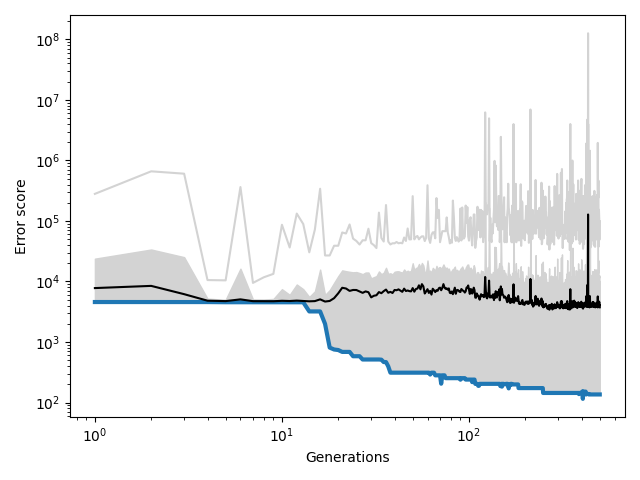

In [12]:
plot_log(log)

In [13]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
g_pas.axonal,0.02823,0.0302,0.02251,0.01775,0.03324,0.03391,0.03518,0.02265,0.03343,0.02899
g_pas.somatic,0.0004675,0.0004147,0.0004932,0.0005698,0.000369,0.0004149,0.0003325,0.000521,0.0005009,0.0004147
g_pas.basal,1.032e-05,1e-05,1.001e-05,1.001e-05,1.001e-05,1e-05,1.032e-05,1.032e-05,1e-05,1e-05
gbar_naf.axonal,0.832,3.853,4.276,7.643,1.668,0.274,0.8663,0.4976,1.055,0.04027
gbar_kas.axonal,0.0108,0.01962,0.09581,0.04163,0.1331,0.06168,0.05269,0.08985,0.0089,0.1327
gbar_Im.axonal,0.0926,0.1944,0.191,0.1999,0.1182,0.09126,0.1264,0.06428,0.1391,0.131
gbar_naf.somatic,8.088,7.482,7.233,7.483,7.375,7.725,7.489,7.407,7.486,7.723
gbar_kaf.somatic,0.2383,0.1752,0.1792,0.1635,0.1868,0.1951,0.1868,0.1469,0.1737,0.1884
gbar_kas.somatic,0.0005635,3.77e-05,2.389e-05,0.0006452,0.0003512,0.0001578,0.0009403,0.000511,1.197e-07,3.597e-06
gbar_kdr.somatic,0.001749,0.0001427,0.0002714,0.0001352,0.0008497,0.0005376,0.0008734,0.0009121,0.0001347,0.0003747


<IPython.core.display.Javascript object>


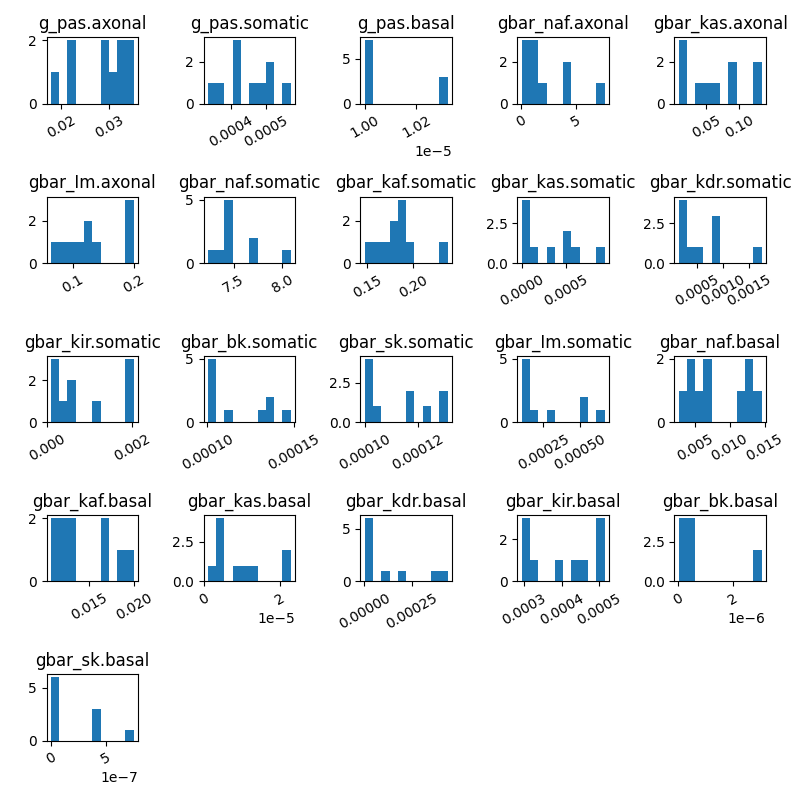

In [14]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


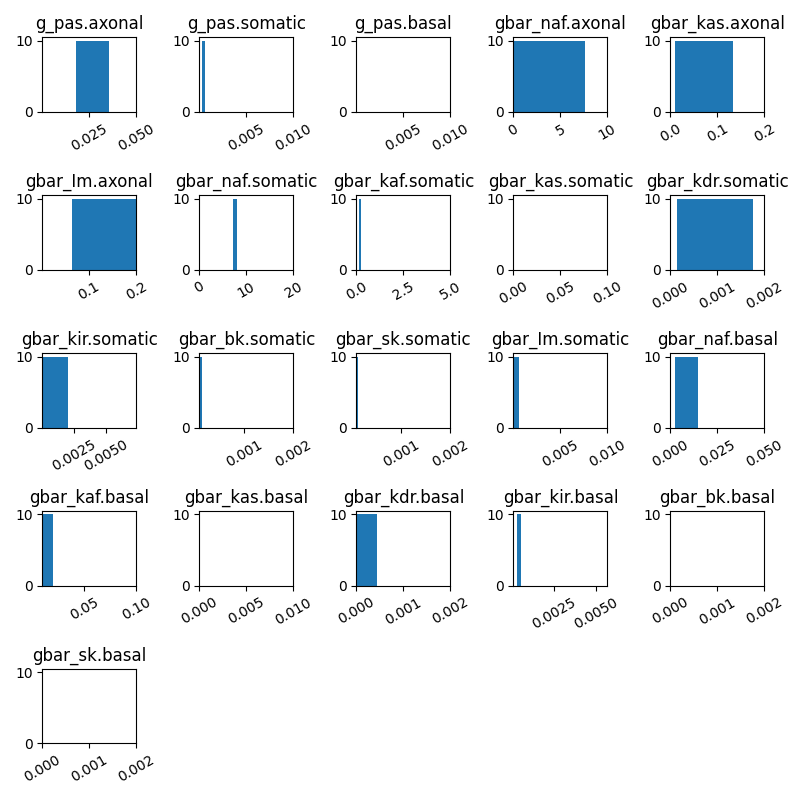

In [15]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [16]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


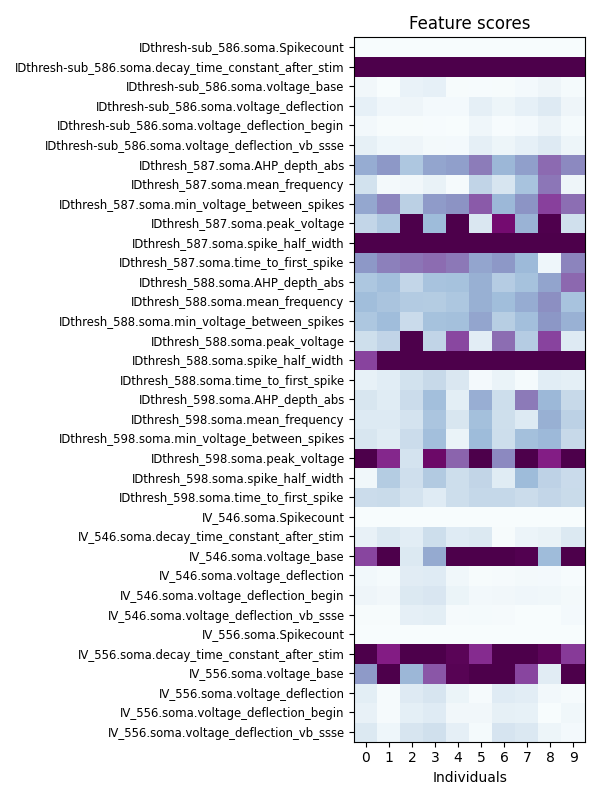

In [17]:
if evaluate_all:
    plot_scores(df, figsize=(6, 8), vmin=0, vmax=10)

## Single-cell simulation

In [18]:
ind = 0
test_parameters = best_models[ind]

In [19]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


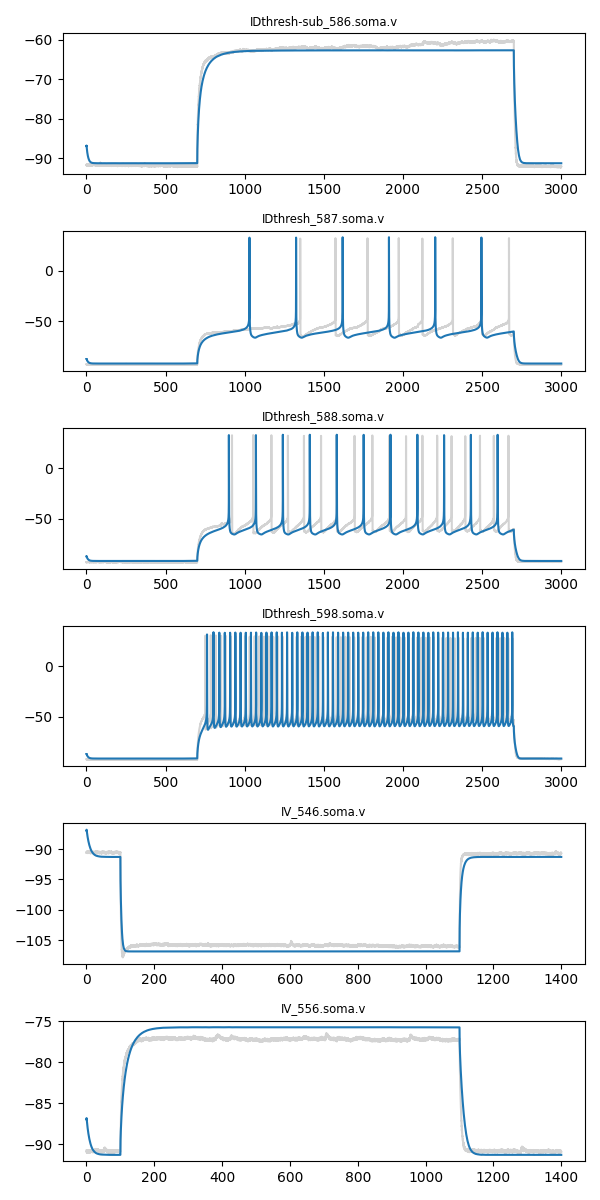

In [20]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


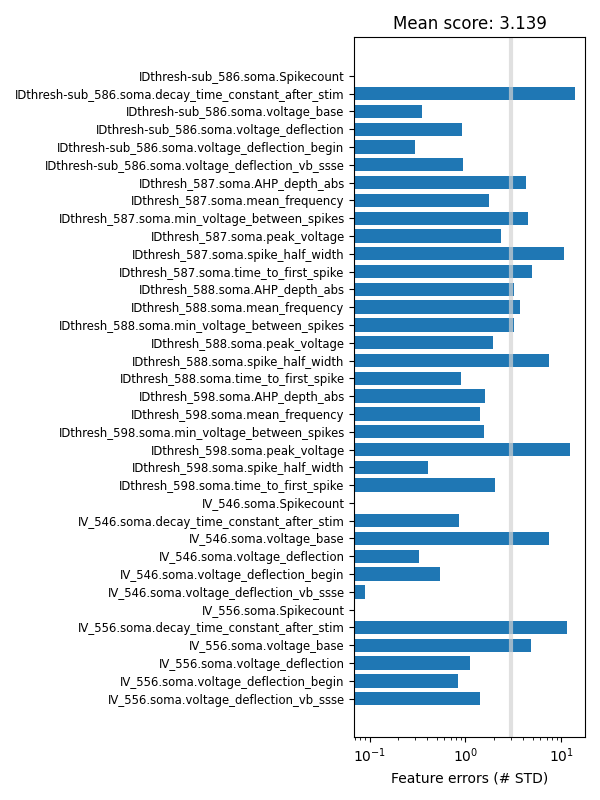

In [21]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,8))

In [22]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,2.250000,2.450000,1.990000,2.060000,2.060000,1.890000,1.050000,2.340000,2.470000
1,2.250000,0.000000,1.590000,2.160000,1.940000,1.830000,2.260000,2.430000,2.150000,1.780000
2,2.450000,1.590000,0.000000,1.830000,1.710000,2.120000,1.900000,2.330000,2.030000,1.970000
3,1.990000,2.160000,1.830000,0.000000,2.140000,2.290000,1.950000,1.960000,2.360000,2.570000
4,2.060000,1.940000,1.710000,2.140000,0.000000,2.000000,1.380000,1.920000,2.220000,2.190000
5,2.060000,1.830000,2.120000,2.290000,2.000000,0.000000,2.280000,1.900000,2.410000,1.830000
6,1.890000,2.260000,1.900000,1.950000,1.380000,2.280000,0.000000,1.780000,2.160000,2.340000
7,1.050000,2.430000,2.330000,1.960000,1.920000,1.900000,1.780000,0.000000,2.540000,2.360000
8,2.340000,2.150000,2.030000,2.360000,2.220000,2.410000,2.160000,2.540000,0.000000,2.210000
9,2.470000,1.780000,1.970000,2.570000,2.190000,1.830000,2.340000,2.360000,2.210000,0.000000


In [23]:
hall_of_fame = []
selected = range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)

In [24]:
zscores = pandas.DataFrame(best_objectives).mean(axis=1)
print(f'Z-score mean {zscores.mean():.3f}, range {zscores.min():.3f}-{zscores.max():.3f}')

Z-score mean 3.913, range 3.139-4.634
